In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uber = pd.read_csv('/content/Uber .csv')
uber.head(3)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421


In [4]:
info = uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [5]:
describe = uber.describe()
describe

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [6]:
# Converting the Date/time into datetime object :-

uber['Date/Time'] = pd.to_datetime(uber['date'])

In [7]:
uber['Hour'] = uber['Date/Time'].dt.hour
uber['DayofWeek'] = uber['Date/Time'].dt.dayofweek
uber['Month'] = uber['Date/Time'].dt.month
uber['Day'] = uber['Date/Time'].dt.day

In [8]:
# Removing the unwanted columns :-

uber.drop(['dispatching_base_number', 'date', 'Date/Time'], axis = 1, inplace = True)

# Performing Exploratery Data Analysis(EDA) :-

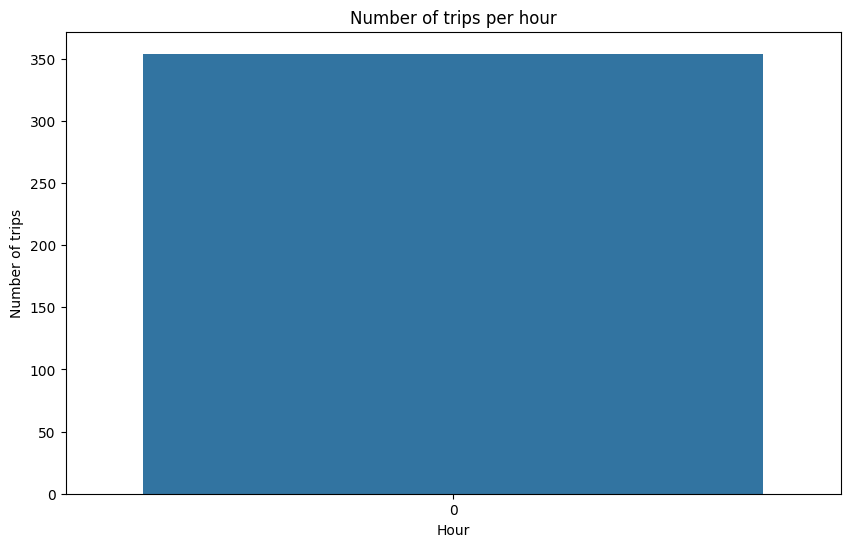

In [9]:
# Finding the numbers of trips per hour :-

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Hour', data=uber)
plt.title('Number of trips per hour')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.show()

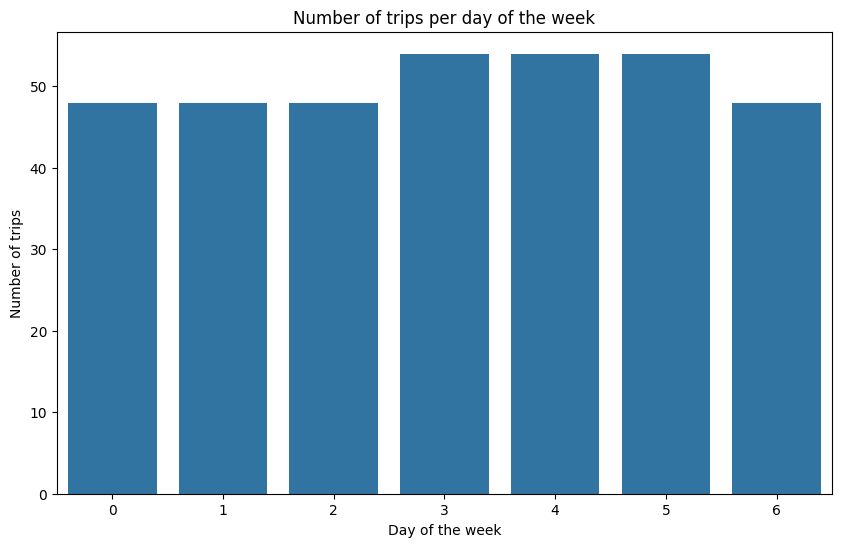

In [10]:
# finding the number of trips per day of the week :-

plt.figure(figsize = (10, 6))
sns.countplot(x = 'DayofWeek', data=uber)
plt.title('Number of trips per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.show()

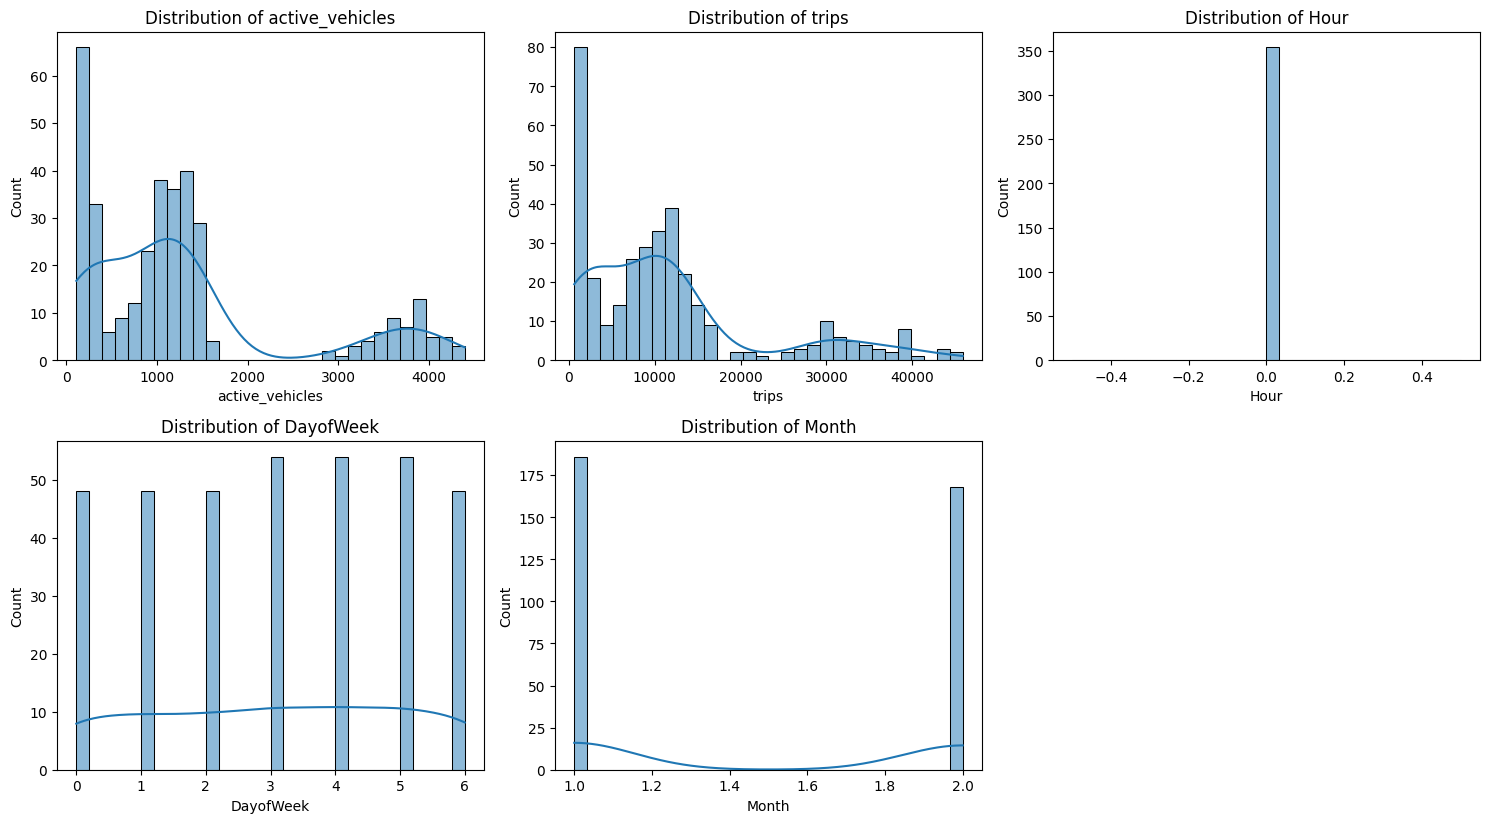

In [11]:
# Plot distribution for all numeric features
plt.figure(figsize=(15, 12))
for i, column in enumerate(uber.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(uber[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<Axes: >

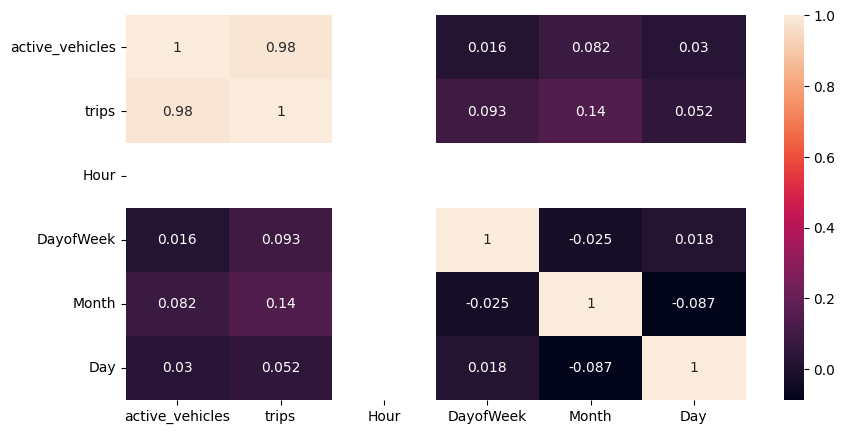

In [12]:
### Corelation of all the features with each other

plt.figure(figsize=(10,5))
sns.heatmap(uber.corr(), annot=True)

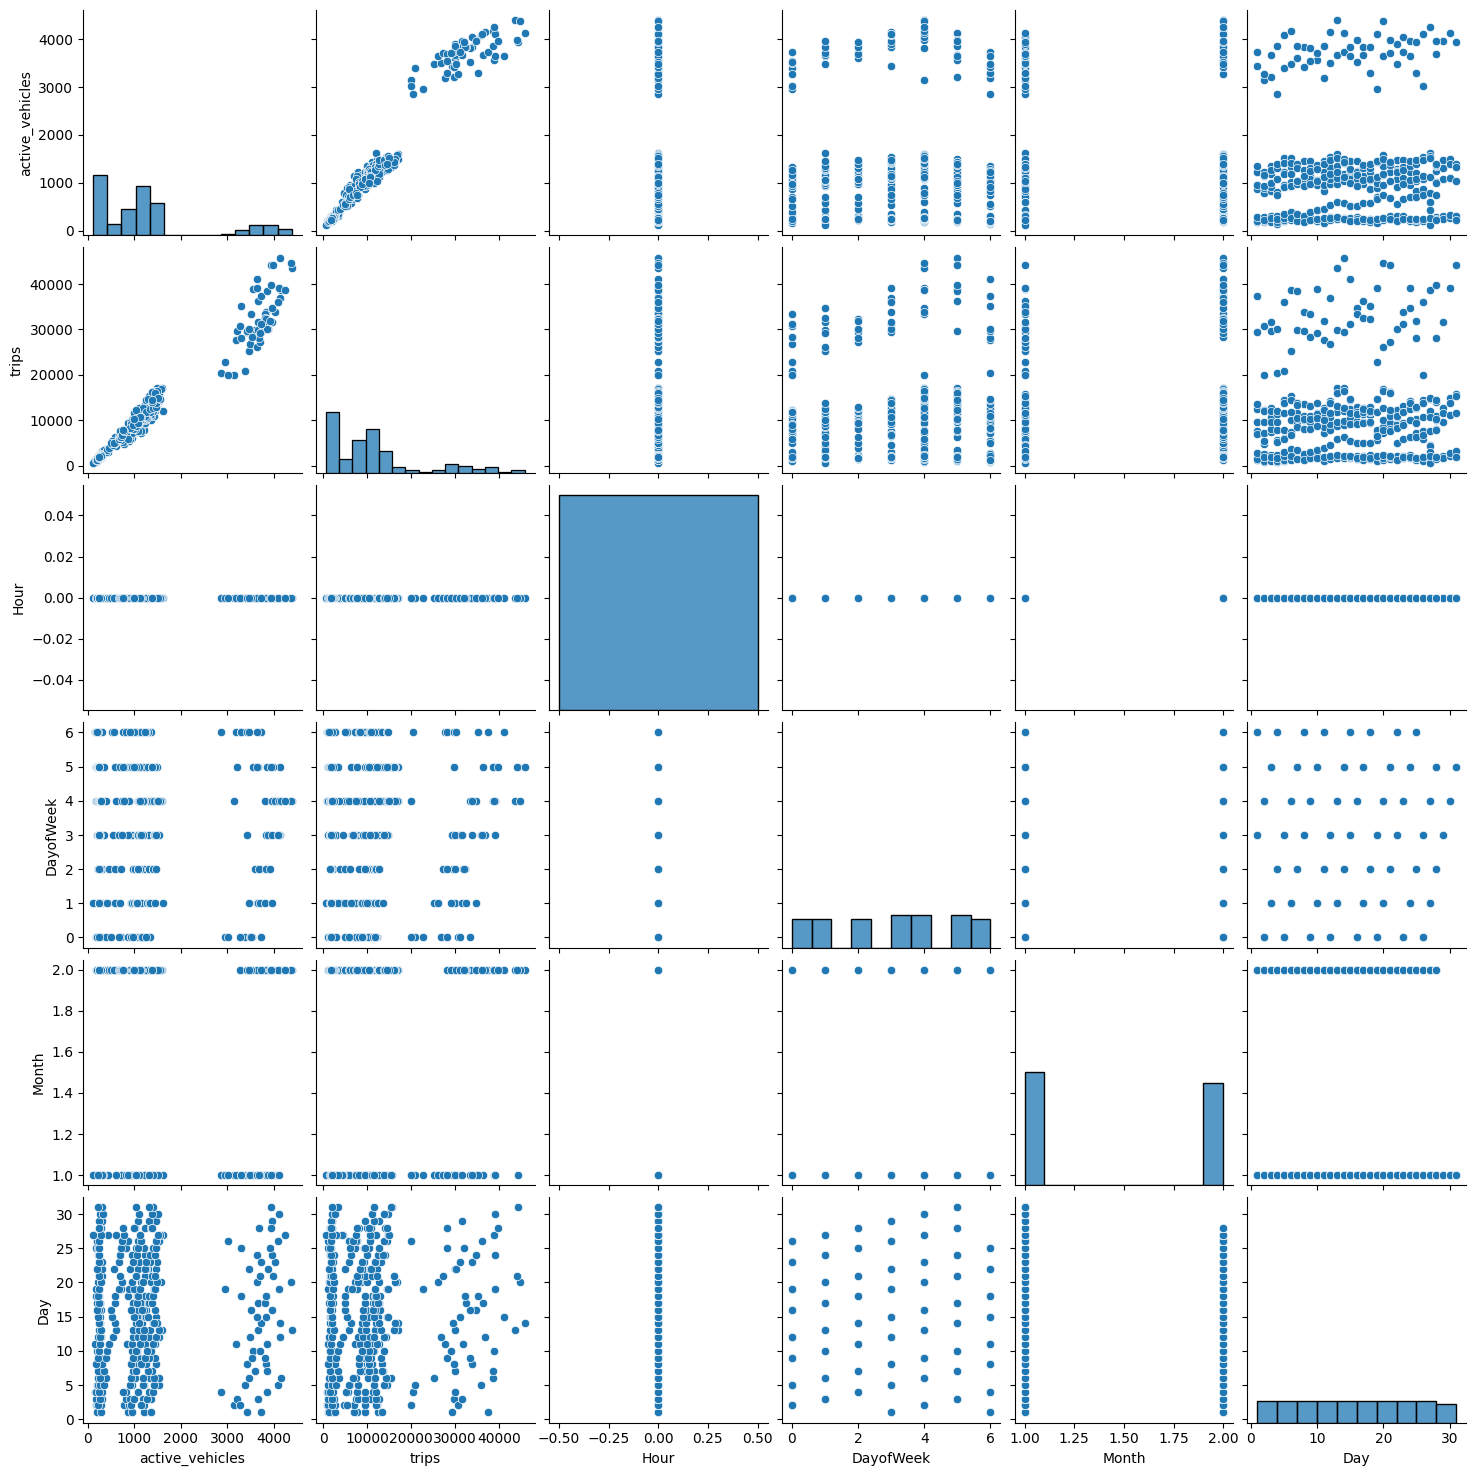

In [13]:
# Using seaborn's pairplot to visualize relationships between all features and target variable
sns.pairplot(uber)
plt.show()

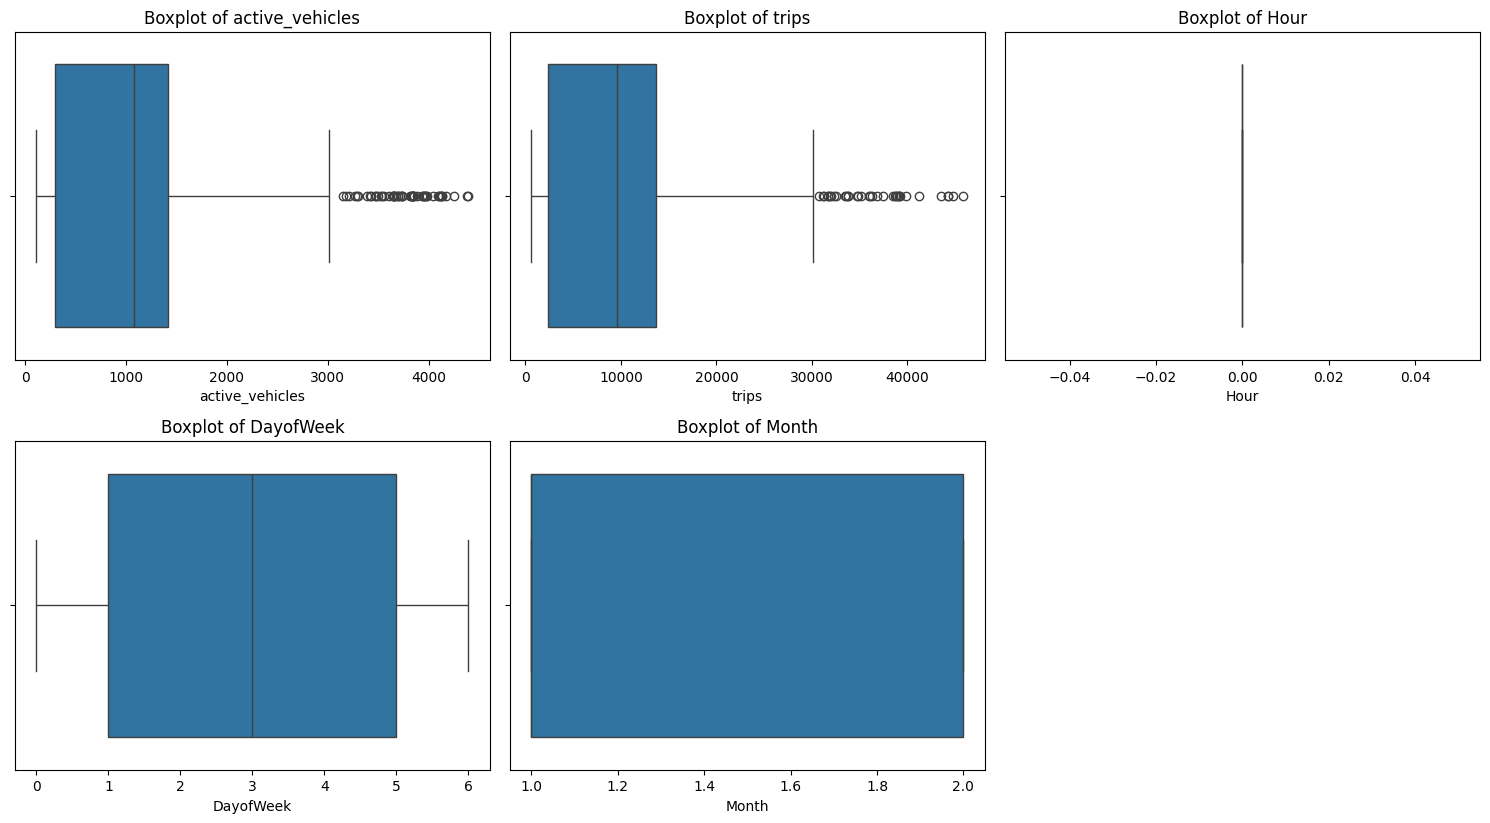

In [14]:
### Box-Plot to detect the outliers in the dataset

plt.figure(figsize=(15, 12))
for i, column in enumerate(uber.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=uber, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

#  Performing Feature Engeneering :-

In [15]:
# Finding the Outliers Using IQR method :-

for column in uber.columns:
  Q1 = uber[column].quantile(0.25)
  Q3 = uber[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = uber[(uber[column] < lower_bound) | (uber[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

active_vehicles: 55 outliers
trips: 35 outliers
Hour: 0 outliers
DayofWeek: 0 outliers
Month: 0 outliers
Day: 0 outliers


In [16]:
# Replacing the Outliers with Mean :-

def replace_outliers_with_mean(df):
    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean = uber[column].mean()
        uber[column] = uber[column].apply(lambda x : mean if (x < lower_bound or x > upper_bound) else x)
    return df


uber = replace_outliers_with_mean(uber)


In [17]:
# By using Mean we have replace 70% of the Outliers :-

for column in uber.columns:
  Q1 = uber[column].quantile(0.25)
  Q3 = uber[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = uber[(uber[column] < lower_bound) | (uber[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

active_vehicles: 3 outliers
trips: 17 outliers
Hour: 0 outliers
DayofWeek: 0 outliers
Month: 0 outliers
Day: 0 outliers


In [18]:
# Replacing the other 30% outliers by using Median :-

def replace_outliers_with_median(df):
    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = uber[column].median()
        uber[column] = uber[column].apply(lambda x : median if (x < lower_bound or x > upper_bound) else x)
    return df


uber = replace_outliers_with_median(uber)

In [19]:
for column in uber.columns:
  Q1 = uber[column].quantile(0.25)
  Q3 = uber[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = uber[(uber[column] < lower_bound) | (uber[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")


active_vehicles: 0 outliers
trips: 0 outliers
Hour: 0 outliers
DayofWeek: 0 outliers
Month: 0 outliers
Day: 0 outliers


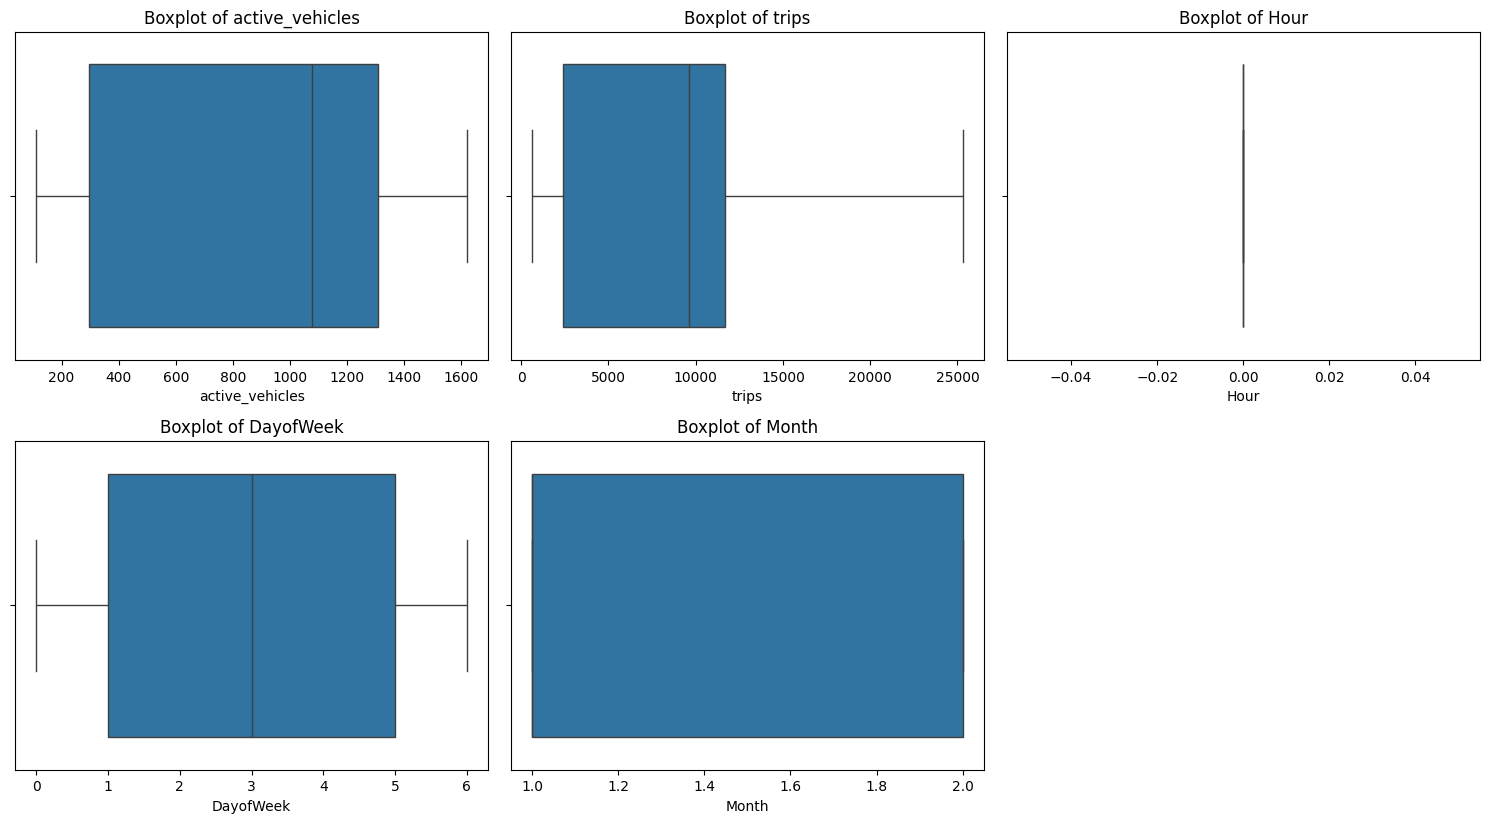

In [20]:
### Confirming by implementing Box-Plot to detect the outliers in the dataset

plt.figure(figsize=(15, 12))
for i, column in enumerate(uber.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=uber, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [21]:
# Applying StandardScalar to scale the Dataset :-

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
uber_scaled = scaler.fit_transform(uber)

In [22]:
import pickle

with open('uber_scaled.pkl', 'wb') as f:
    pickle.dump(uber_scaled, f)

In [23]:
X = uber.drop(columns = ['trips'])
Y = uber['trips']

In [24]:
# Splitting the X & Y into train test split :-

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Applying the models :-

models = {
    'Linear Regression': LinearRegression(),
    'XGBoost Regression': xgb.XGBRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

In [53]:
best_model = None
best_r2_score = -float('inf')
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    current_r2_score = model.score(X_test, Y_test)
    print(f"{name}: R2 Score = {current_r2_score}")
    if current_r2_score > best_r2_score:
        best_r2_score = current_r2_score
        best_model = model

print(f"Best Model: {best_model}")

Linear Regression: R2 Score = 0.7975797565194953
XGBoost Regression: R2 Score = 0.7869621230384813
Decision Tree Regression: R2 Score = 0.6533524310546396
Random Forest Regression: R2 Score = 0.8009682011933563
Gradient Boosting Regression: R2 Score = 0.8301441232210967
Best Model: GradientBoostingRegressor()


# Building Gradiant Boosting Regresser model bcz it is giving higher r2 score :-

In [42]:
Gbr = GradientBoostingRegressor(random_state=42)

In [44]:
# Parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10, 1),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 5, 1)
}

# Applying RandomizedSearchCV :-

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=Gbr,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit to training data
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='r2', verbose=2)

In [55]:
from sklearn.metrics import r2_score as r2_score_function

# Display best parameters and training CV score
print("Best parameters found: ", random_search.best_params_)
print("Best CV R² score: ", random_search.best_score_)

# Best model from search
Gbr_best_model = random_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test)
print("R² on test set:", r2_score_function(Y_test, y_pred))

Best parameters found:  {'n_estimators': np.int64(350), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(1), 'max_depth': np.int64(4), 'learning_rate': np.float64(0.01)}
Best CV R² score:  0.8795200846197522
R² on test set: 0.8239831125757817


In [56]:
# Save the model :-

import pickle

with open('Gbr_best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [57]:
# Loaded the save model :-

with open('Gbr_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [59]:
# make predictions on new data :-
Gbr_best_model.predict(X_test)

array([ 8747.44992565, 11728.3721593 ,  1866.93106407, 14391.18599989,
       11231.1653955 , 11539.68835051,  9418.64966986,  1988.26609137,
        8925.10325108,  1685.70412133,  5772.81567252,  1326.38330168,
        3275.66009819,  9553.34837639,  1479.121353  , 12815.6256923 ,
       11781.79520301, 11381.79926411, 11625.09209712, 10370.59395742,
       14391.18599989, 11813.37202738,  2006.03654801, 14259.74055649,
        2439.68947827,  1261.11269815, 12297.76712875, 12521.28911792,
        6829.90340285,  2099.50334419,  1953.56297287,  5450.78731143,
        7903.9129004 , 14146.08799756, 10804.99425883,  9881.81417196,
        9007.47431994,  8120.30682124,  2607.81269851, 10725.8518716 ,
        8631.57032915, 17768.24070768, 11012.72109036, 10645.05904684,
        1721.33172412,  5843.75490761,  8887.40282131, 11741.804596  ,
        1261.11269815,  8256.72370414, 10494.93009221,  2046.88954679,
        1450.52336959, 12973.86461172,  2110.21750851,  2198.26258567,
      

In [60]:
uber.describe()

,active_vehicles,trips,Hour,DayofWeek,Month,Day
count,354.000000,354.000000,354.0,354.000000,354.000000,354.000000
mean,910.454595,8273.118852,0.0,3.050847,1.474576,15.288136
std,468.430869,4900.310001,0.0,1.972247,0.500060,8.588913
min,112.000000,629.000000,0.0,0.000000,1.000000,1.000000
25%,296.750000,2408.500000,0.0,1.000000,1.000000,8.000000
50%,1076.500000,9600.500000,0.0,3.000000,1.000000,15.000000
75%,1307.435028,11667.316384,0.0,5.000000,2.000000,23.000000
max,1619.000000,25301.000000,0.0,6.000000,2.000000,31.000000
